In [15]:
%pip install pandas
%pip install pm4py


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import pm4py

In [17]:
# path of the correct dataset given
path = 'dataset/'

# path in which we save the processed data
path_data = path + 'data/'

# path in which we are going to save the xes file
path_xes = path_data + 'xes/'

# path in which we are going to save the petri net 
path_petri_net = 'petri_net/'
path_petri_net_all_senior = path_petri_net + 'All_senior/'
path_petri_net_senior_1 = path_petri_net + 'Senior_1/'
path_petri_net_senior_2 = path_petri_net + 'Senior_2/'
path_petri_net_senior_3 = path_petri_net + 'Senior_3/'

# Adapting the txt file to the task at hand
The dataset given is a file txt from which we will take only the data we need and make save in another file

In [18]:
# file open
f = open(path + 'mpo_def30.txt', 'r')
lines = f.readlines()[:]

In [19]:
lines = [line.replace('\\','') for line in lines]
lines = [line.replace('\n','') for line in lines]
lines[:5]

['entry(1,begin_of_process,monday,monday6637,none,none).',
 'entry(2,begin_of_activity,monday,monday6637,sit_down,1).',
 'entry(3,begin_of_activity,monday,monday6637,eat_meal,1).',
 'entry(4,end_of_activity,monday,monday6637,eat_meal,1).',
 'entry(5,end_of_activity,monday,monday6637,sit_down,1).']

In [20]:
# get the relevant information of all lines
lines = [line.split('(')[1] for line in lines]
lines = [line.split(')')[0] for line in lines]
lines[:5]

['1,begin_of_process,monday,monday6637,none,none',
 '2,begin_of_activity,monday,monday6637,sit_down,1',
 '3,begin_of_activity,monday,monday6637,eat_meal,1',
 '4,end_of_activity,monday,monday6637,eat_meal,1',
 '5,end_of_activity,monday,monday6637,sit_down,1']

In [21]:
# Save the CSV
write_file = open(path_data + 'mpo_def30.txt', 'w')
write_file.write("\n".join(lines))

24918

# Import data as CSV

In [22]:
# According to the paper, we set the column name as the description of the 
# 6-tuple
columns_name = [
    'Case_Identifier',
    'Event_Timestamp' , 
    'Type_Of_Event', 
    'Reference_Workflow',
    'Senior',
    'Name_Activity',
    'Occurrency_Of_Activity'
]

df = pd.read_csv(path_data + 'our_dataset.txt', names = columns_name)
df = df[df['Name_Activity'] != 'none']
df = df[df['Name_Activity'] != ' none']
df.head()

Case_Identifier    Event_Timestamp   Type_Of_Event Reference_Workflow  \
1       Monday_S1  01-01-24 08:07:12  begin_activity             Monday   
3       Monday_S2  01-01-24 08:08:30  begin_activity             Monday   
5       Monday_S3  01-01-24 08:10:45  begin_activity             Monday   
6       Monday_S1  01-01-24 08:15:25    end_activity             Monday   
7       Monday_S1  01-01-24 08:17:45  begin_activity             Monday   

  Senior      Name_Activity Occurrency_Of_Activity  
1     S1           sit_down                      1  
3     S2  physical_activity                      1  
5     S3           eat_meal                      1  
6     S1           sit_down                      1  
7     S1     take_medicines                      1

In [23]:
set(df['Name_Activity'].values)

{'be_in_bathroom',
 'be_in_company',
 'drink',
 'eat_meal',
 'hobby',
 'physical_activity',
 'play_phone',
 'read',
 'sit_down',
 'sleep',
 'take_medicines'}

# All senior

In [24]:
log = pm4py.format_dataframe(df,
                            case_id='Type_Of_Event',
                            activity_key='Name_Activity', 
                            timestamp_key='Event_Timestamp'
                           ) 

log = pm4py.convert_to_event_log(log)
pm4py.write_xes(log, path_xes + 'all_senior_1.xes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:536: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")
exporting log, completed traces :: 100%|██████████| 2/2 [00:00<00:00, 43.19it/s]


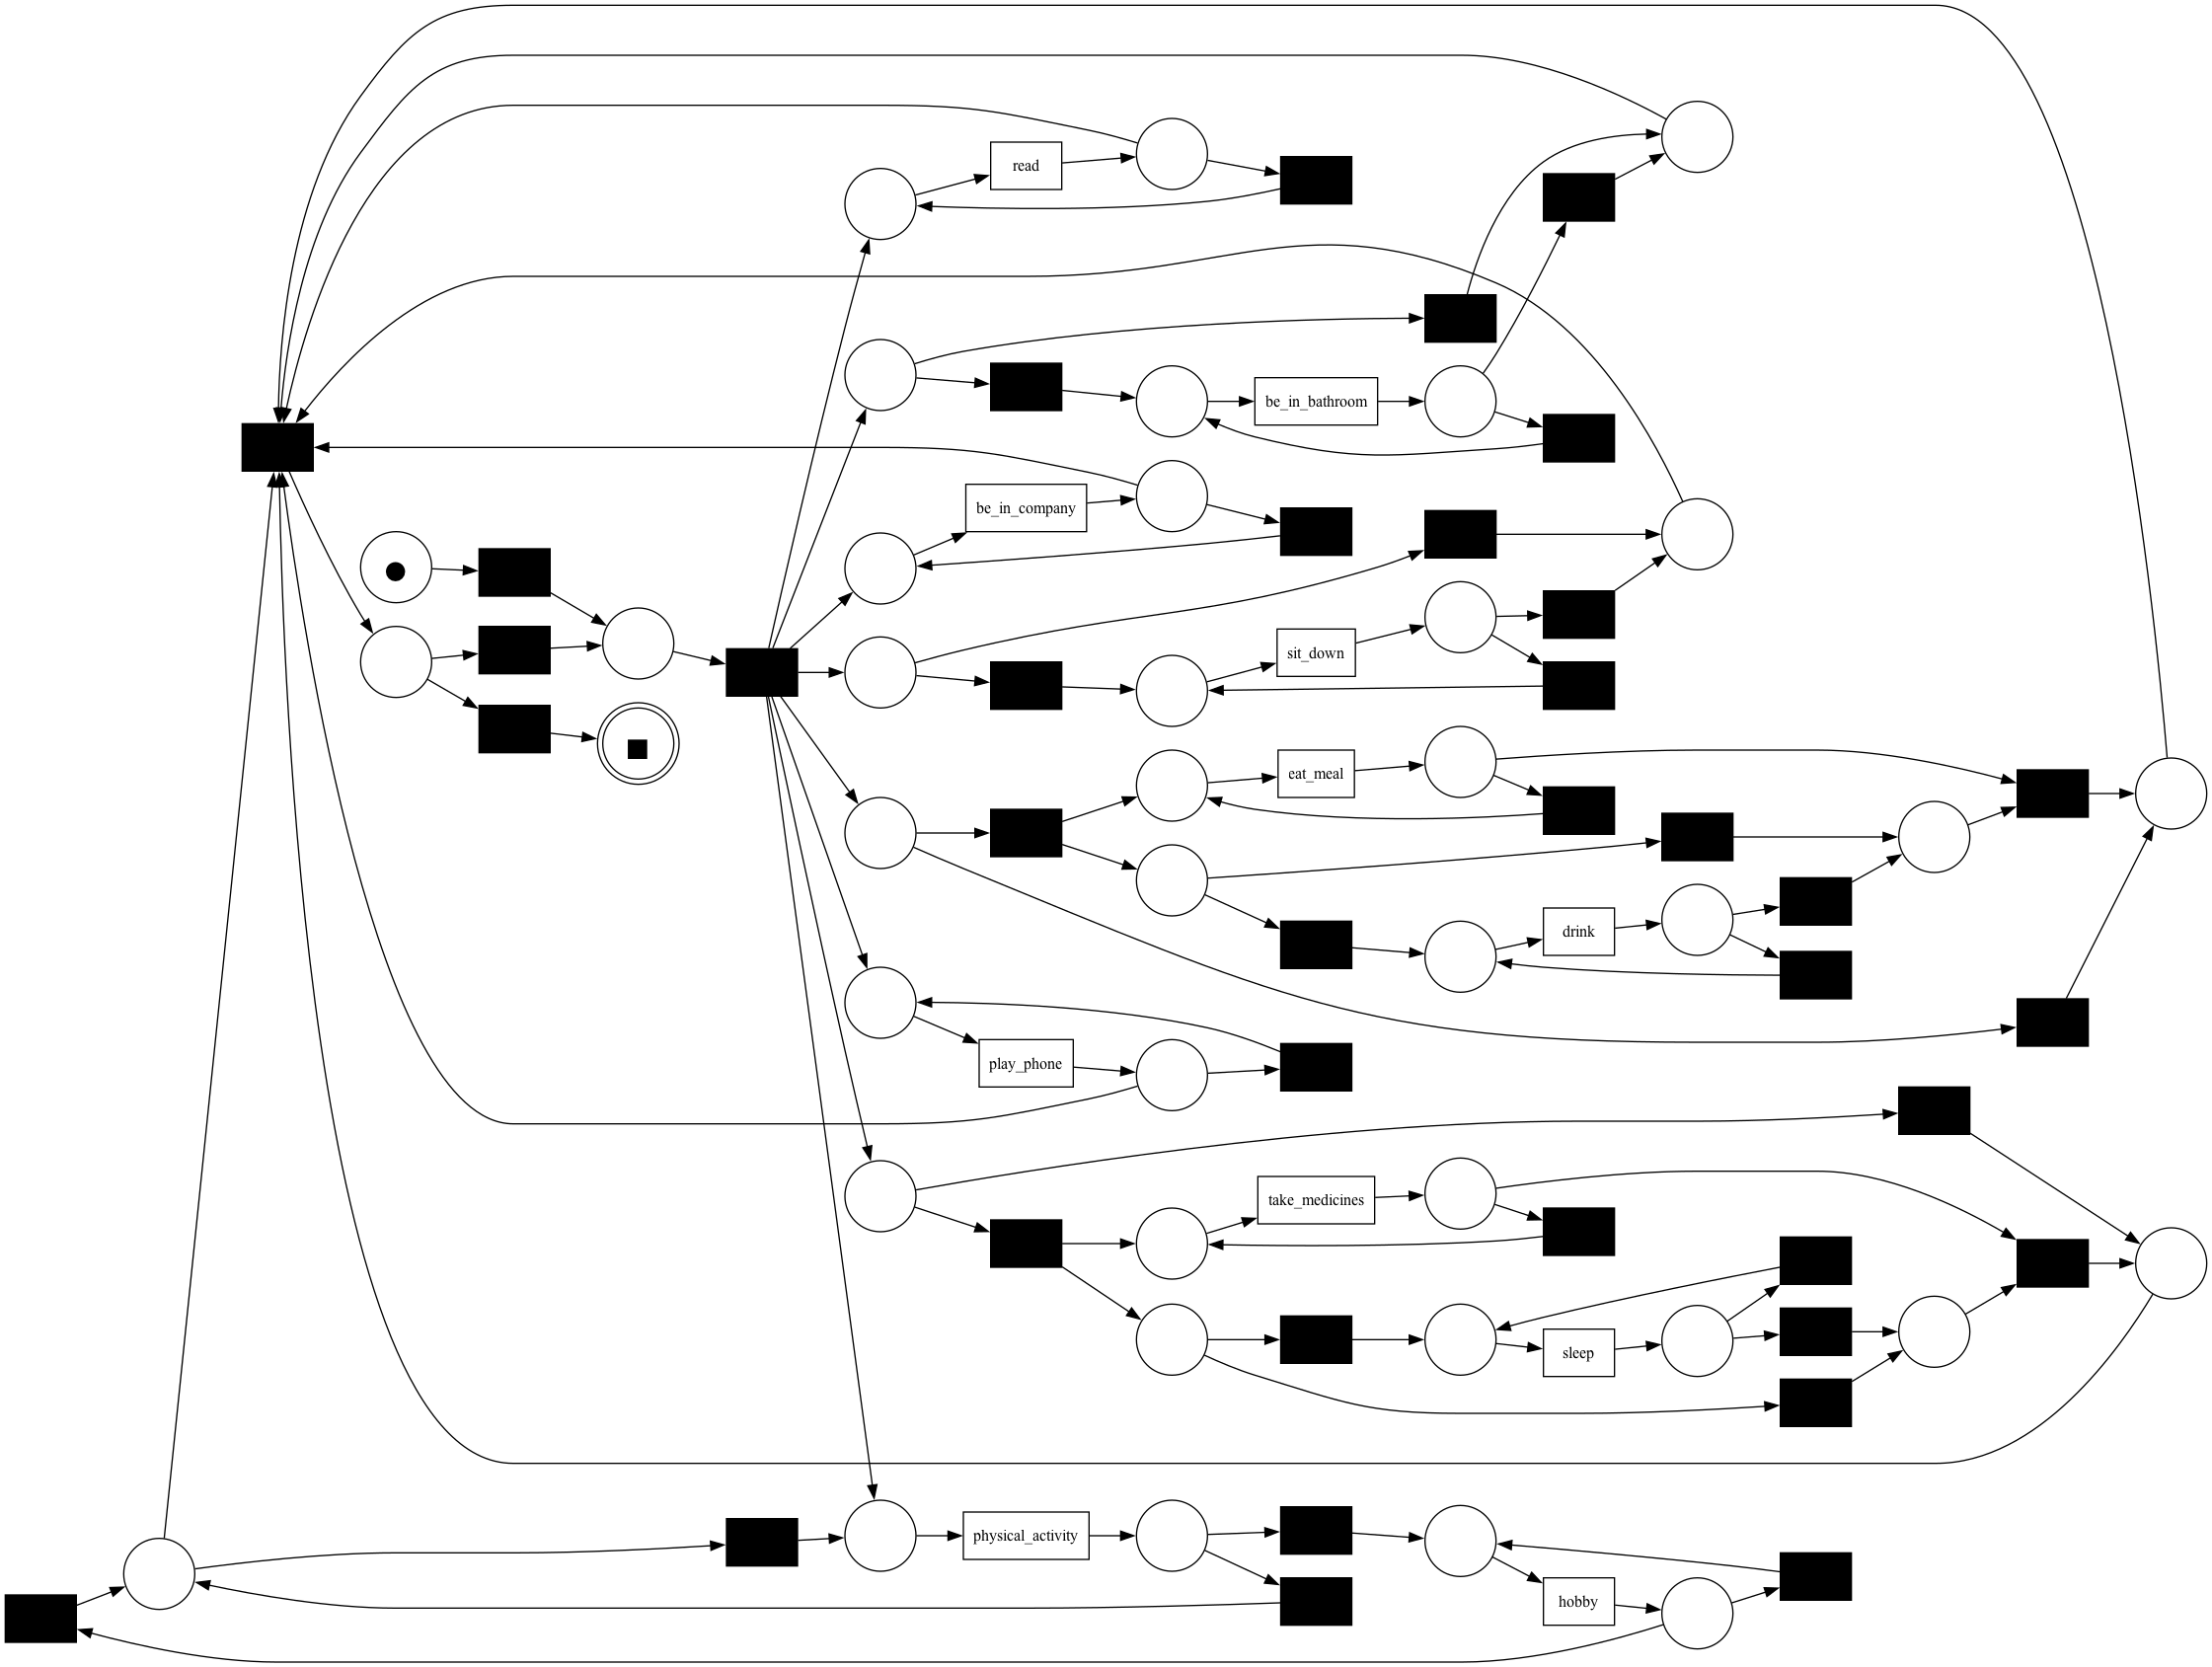

In [25]:
inductive_net, inductive_im, inductive_fm = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(inductive_net, inductive_im, inductive_fm)

In [26]:
pm4py.vis.save_vis_petri_net(inductive_net,
                             inductive_im,
                             inductive_fm,
                             file_path=path_petri_net_all_senior + 'inductive_petri_net_all_senior.png'
                             )

''

In [27]:
# Fitness inductive petri net of all the senior

# fitness_inductive = pm4py.fitness_token_based_replay(log, inductive_net, inductive_im, inductive_fm)
# fitness_inductive

In [28]:
# Precision inductive petri net of all the senior

# prec_inductive = pm4py.precision_alignments(log,inductive_net, inductive_im, inductive_fm)
# prec_inductive

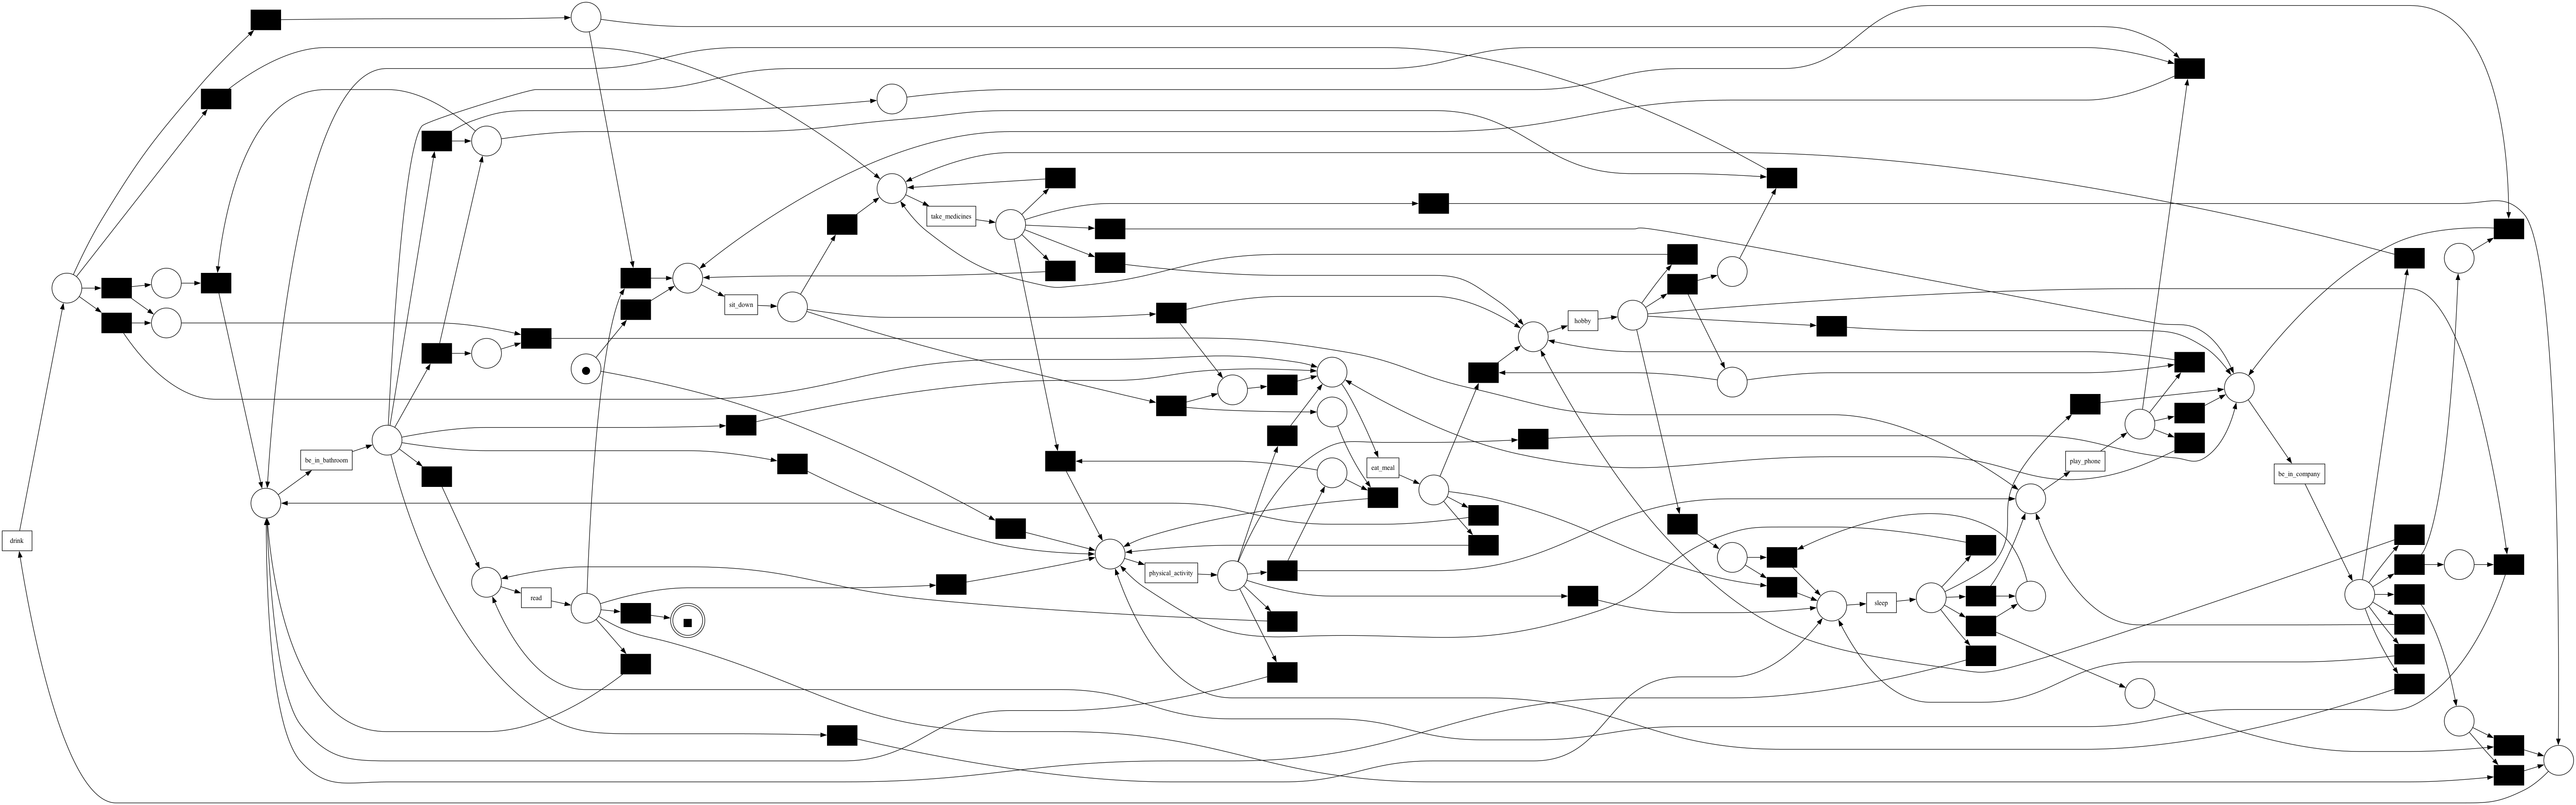

In [29]:
heuristics_net, heuristics_im, heuristics_fm = pm4py.discover_petri_net_heuristics(log)
pm4py.view_petri_net(heuristics_net, heuristics_im, heuristics_fm)

In [30]:
pm4py.vis.save_vis_petri_net(heuristics_net,
                             heuristics_im,
                             heuristics_fm,
                             file_path= path_petri_net_all_senior +'heuristic_petri_net_all_senior.png'
                             )

''

In [31]:
# Fitness inductive petri net of all the senior

# fitness_heuristic = pm4py.fitness_token_based_replay(log, inductive_net, inductive_im, inductive_fm)
# fitness_heuristic

In [32]:
# Precision inductive petri net of all the senior

# prec_heuristic = pm4py.precision_alignments(log,inductive_net, inductive_im, inductive_fm)
# prec_heuristic

In [33]:
# from pm4py.objects.petri_net.utils import reachability_graph
# from pm4py.visualization.transition_system import visualizer as ts_visualizer


# ts = reachability_graph.construct_reachability_graph(inductive_net, inductive_im)
# gviz = ts_visualizer.apply(ts, parameters={ts_visualizer.Variants.VIEW_BASED.value.Parameters.FORMAT: "svg"})
# ts_visualizer.view(gviz)

## Senior S1

In [34]:
df_s1 = df[df['Senior']== 'S1']
df_s1.head()

Case_Identifier           Event_Timestamp   Type_Of_Event  \
1       Monday_S1 2024-01-01 08:07:12+00:00  begin_activity   
6       Monday_S1 2024-01-01 08:15:25+00:00    end_activity   
7       Monday_S1 2024-01-01 08:17:45+00:00  begin_activity   
8       Monday_S1 2024-01-01 08:19:45+00:00    end_activity   
9       Monday_S1 2024-01-01 08:20:18+00:00  begin_activity   

  Reference_Workflow Senior   Name_Activity Occurrency_Of_Activity  \
1             Monday     S1        sit_down                      1   
6             Monday     S1        sit_down                      1   
7             Monday     S1  take_medicines                      1   
8             Monday     S1  take_medicines                      1   
9             Monday     S1        eat_meal                      2   

  case:concept:name    concept:name            time:timestamp  
1    begin_activity        sit_down 2024-01-01 08:07:12+00:00  
6      end_activity        sit_down 2024-01-01 08:15:25+00:00  
7    begin_activity  take_medicines 2024-01-01 08:17:45+00:00  
8      end_activity  take_medicines 2024-01-01 08:19:45+00:00  
9    begin_activity        eat_meal 2024-01-01 08:20:18+00:00

In [35]:
log_s1 = pm4py.format_dataframe(df_s1,
                            case_id='Type_Of_Event',
                            activity_key='Name_Activity', 
                            timestamp_key='Event_Timestamp'
                           ) 

log_s1 = pm4py.convert_to_event_log(log_s1)
pm4py.write_xes(log, path_xes + 'senior_1.xes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[constants.CASE_CONCEPT_NAME] = df[case_id]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[xes_constants.DEFAULT_NAME_KEY] = df[activity_key]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:85: SettingWithCopyWarning:

exporting log, completed traces :: 100%|██████████| 2/2 [00:00<00:00, 33.96it/s]


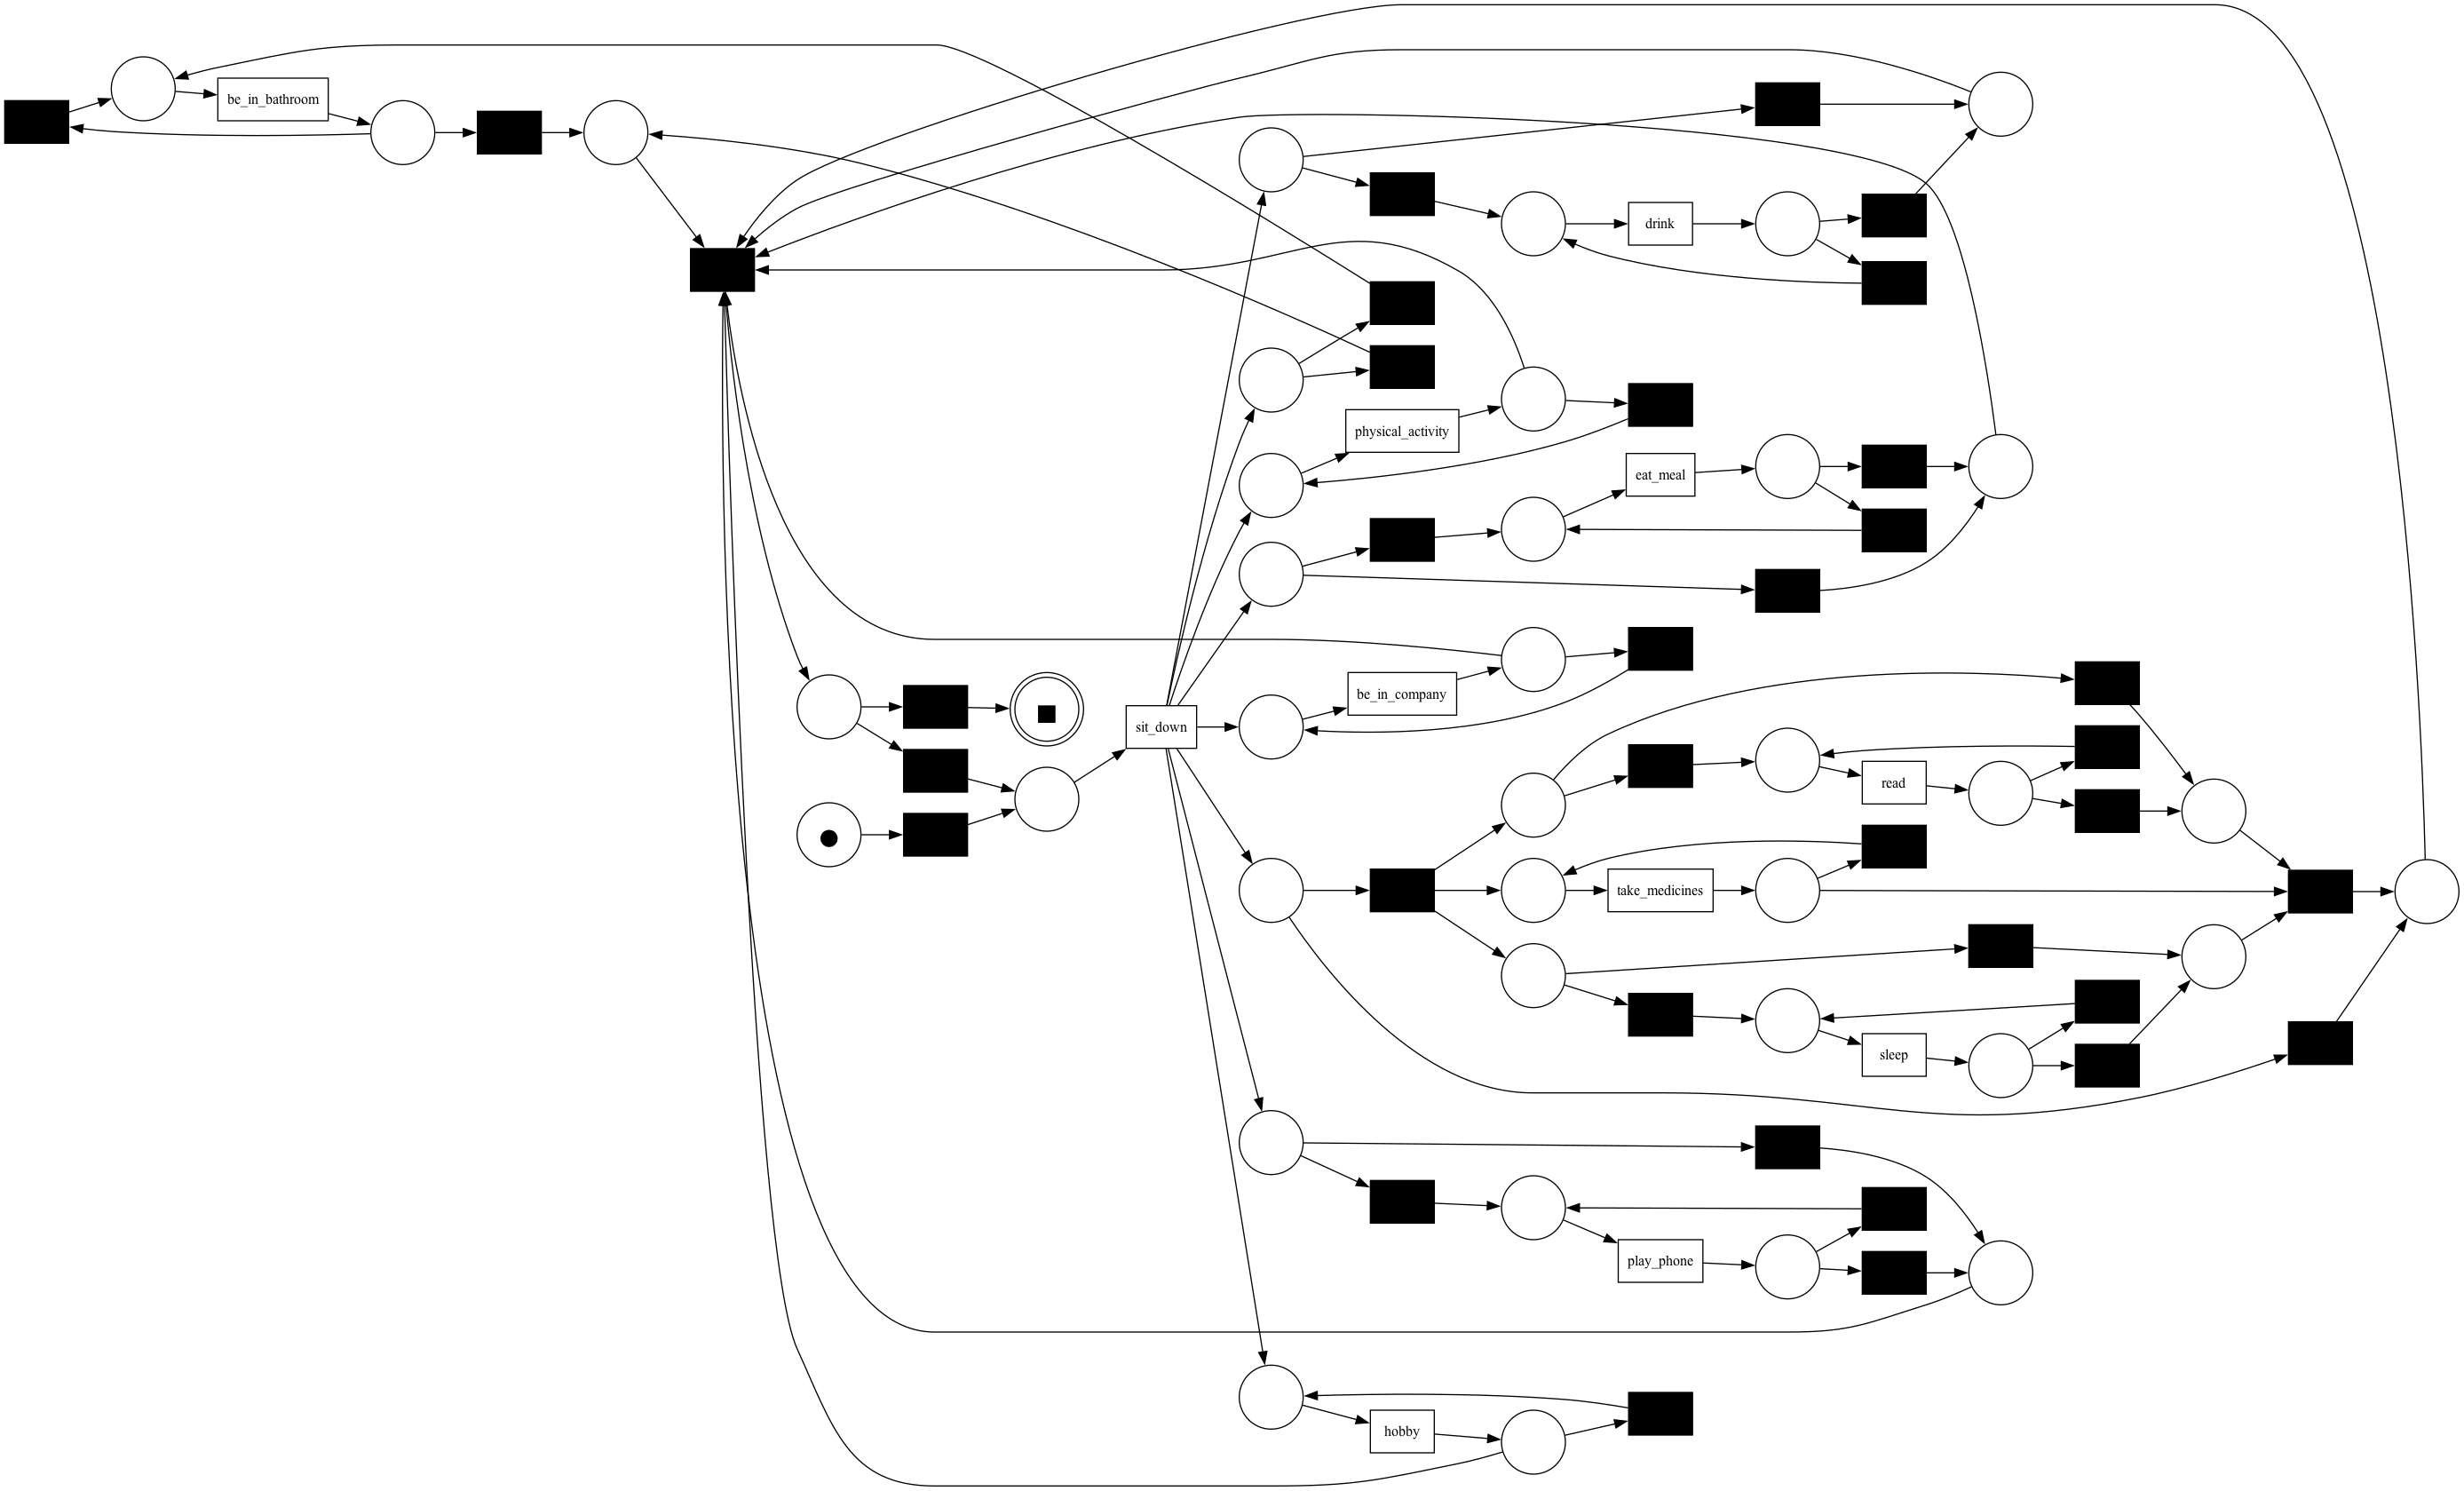

In [36]:
inductive_net_s1, inductive_im_s1, inductive_fm_s1 = pm4py.discover_petri_net_inductive(log_s1)
pm4py.view_petri_net(inductive_net_s1, inductive_im_s1, inductive_fm_s1)

In [37]:
# save the inductive petri net of the senior 1

pm4py.vis.save_vis_petri_net(inductive_net_s1, 
                             inductive_im_s1,
                             inductive_fm_s1,
                             file_path= path_petri_net_senior_1 +'inductive_petri_net.png'
                             )

''

In [38]:
# Fitness inductive petri net of the senior 1

# fitness_inductive = pm4py.fitness_token_based_replay(log, inductive_net, inductive_im, inductive_fm)
# fitness_inductive

In [39]:
# Precision inductive petri net of the senior 1

# prec_inductive = pm4py.precision_alignments(log,inductive_net, inductive_im, inductive_fm)
# prec_inductive

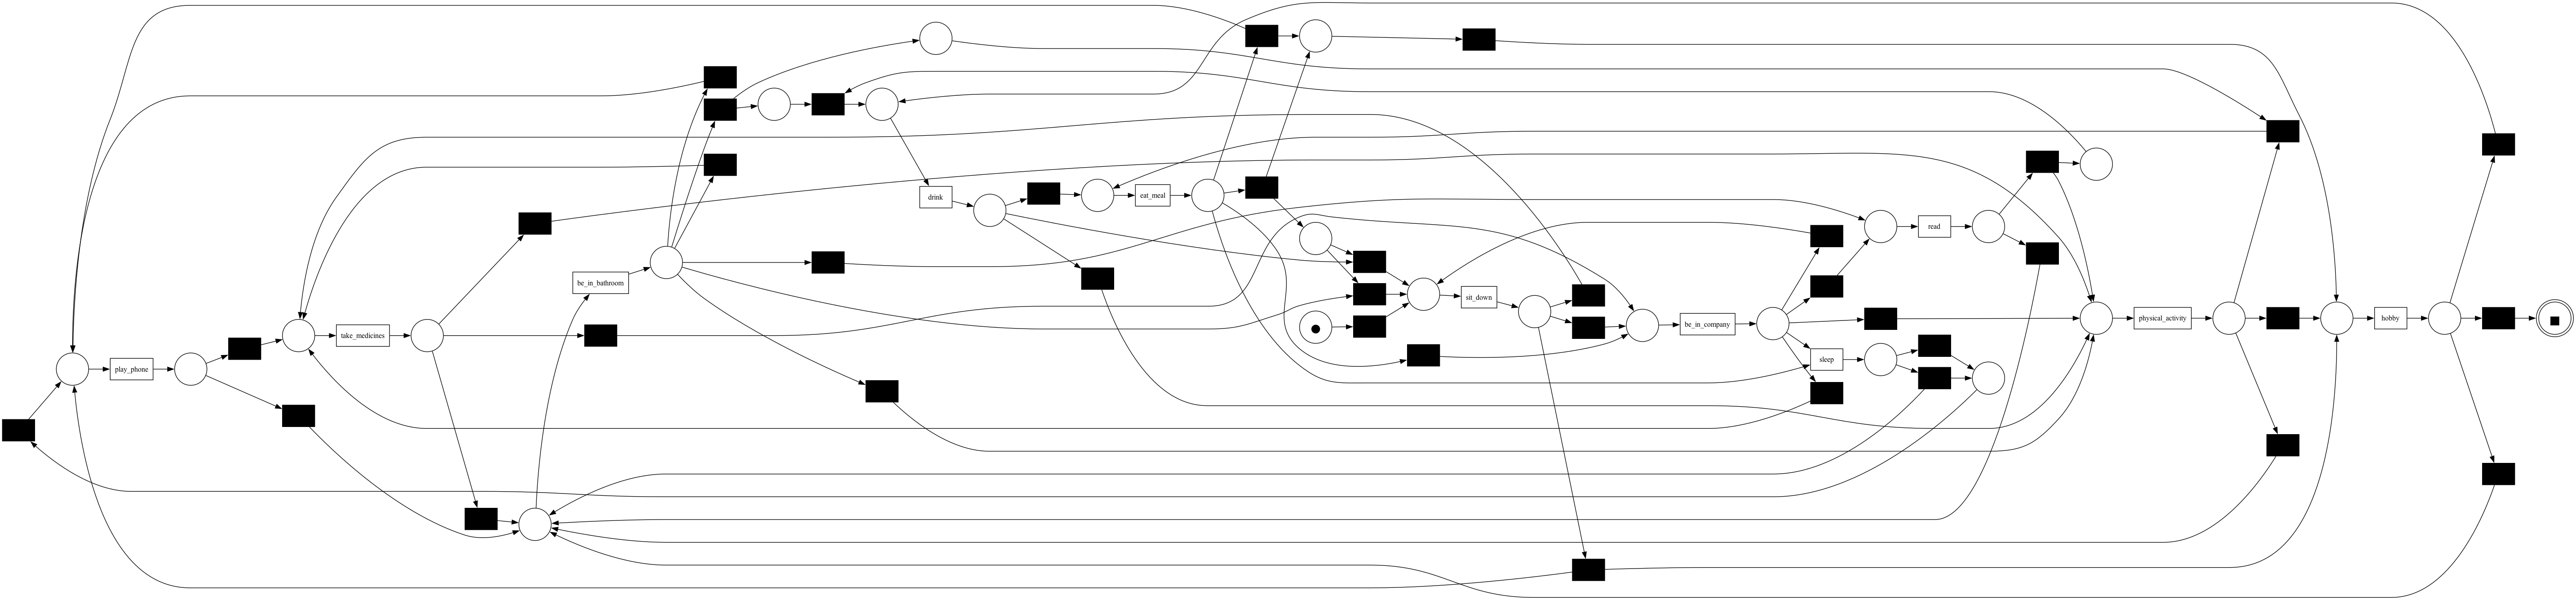

In [40]:
heuristic_net_s1, heuristic_im_s1, heuristic_fm_s1 = pm4py.discover_petri_net_heuristics(log_s1)
pm4py.view_petri_net(heuristic_net_s1, heuristic_im_s1, heuristic_fm_s1)

In [41]:
# save the heuristic petri net of the senior 1

pm4py.vis.save_vis_petri_net(heuristic_net_s1, 
                             heuristic_im_s1,
                             heuristic_fm_s1,
                             file_path= path_petri_net_senior_1 +'heuristic_petri_net.png'
                             )

''

In [42]:
# Fitness inductive petri net of the senior 1

# fitness_heuristic = pm4py.fitness_token_based_replay(log, inductive_net, inductive_im, inductive_fm)
# fitness_heuristic

In [43]:
# Precision inductive petri net of the senior 1

# prec_heuristic = pm4py.precision_alignments(log,inductive_net, inductive_im, inductive_fm)
# prec_heuristic

## Senior 2

In [44]:
df_s2 = df[df['Senior']== 'S2']
df_s2.head()

Case_Identifier           Event_Timestamp   Type_Of_Event  \
3        Monday_S2 2024-01-01 08:08:30+00:00  begin_activity   
10       Monday_S2 2024-01-01 08:12:45+00:00    end_activity   
11       Monday_S2 2024-01-01 08:14:45+00:00  begin_activity   
12       Monday_S2 2024-01-01 08:16:45+00:00    end_activity   
13       Monday_S2 2024-01-01 08:17:30+00:00  begin_activity   

   Reference_Workflow Senior      Name_Activity Occurrency_Of_Activity  \
3              Monday     S2  physical_activity                      1   
10             Monday     S2  physical_activity                      1   
11             Monday     S2     take_medicines                      1   
12             Monday     S2     take_medicines                      1   
13             Monday     S2              drink                      1   

   case:concept:name       concept:name            time:timestamp  
3     begin_activity  physical_activity 2024-01-01 08:08:30+00:00  
10      end_activity  physical_activity 2024-01-01 08:12:45+00:00  
11    begin_activity     take_medicines 2024-01-01 08:14:45+00:00  
12      end_activity     take_medicines 2024-01-01 08:16:45+00:00  
13    begin_activity              drink 2024-01-01 08:17:30+00:00

In [45]:
log_s2 = pm4py.format_dataframe(df_s2,
                            case_id='Type_Of_Event',
                            activity_key='Name_Activity', 
                            timestamp_key='Event_Timestamp'
                           ) 

log_s2 = pm4py.convert_to_event_log(log_s2)
pm4py.write_xes(log, path_xes + 'senior_2.xes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[constants.CASE_CONCEPT_NAME] = df[case_id]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[xes_constants.DEFAULT_NAME_KEY] = df[activity_key]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:85: SettingWithCopyWarning:

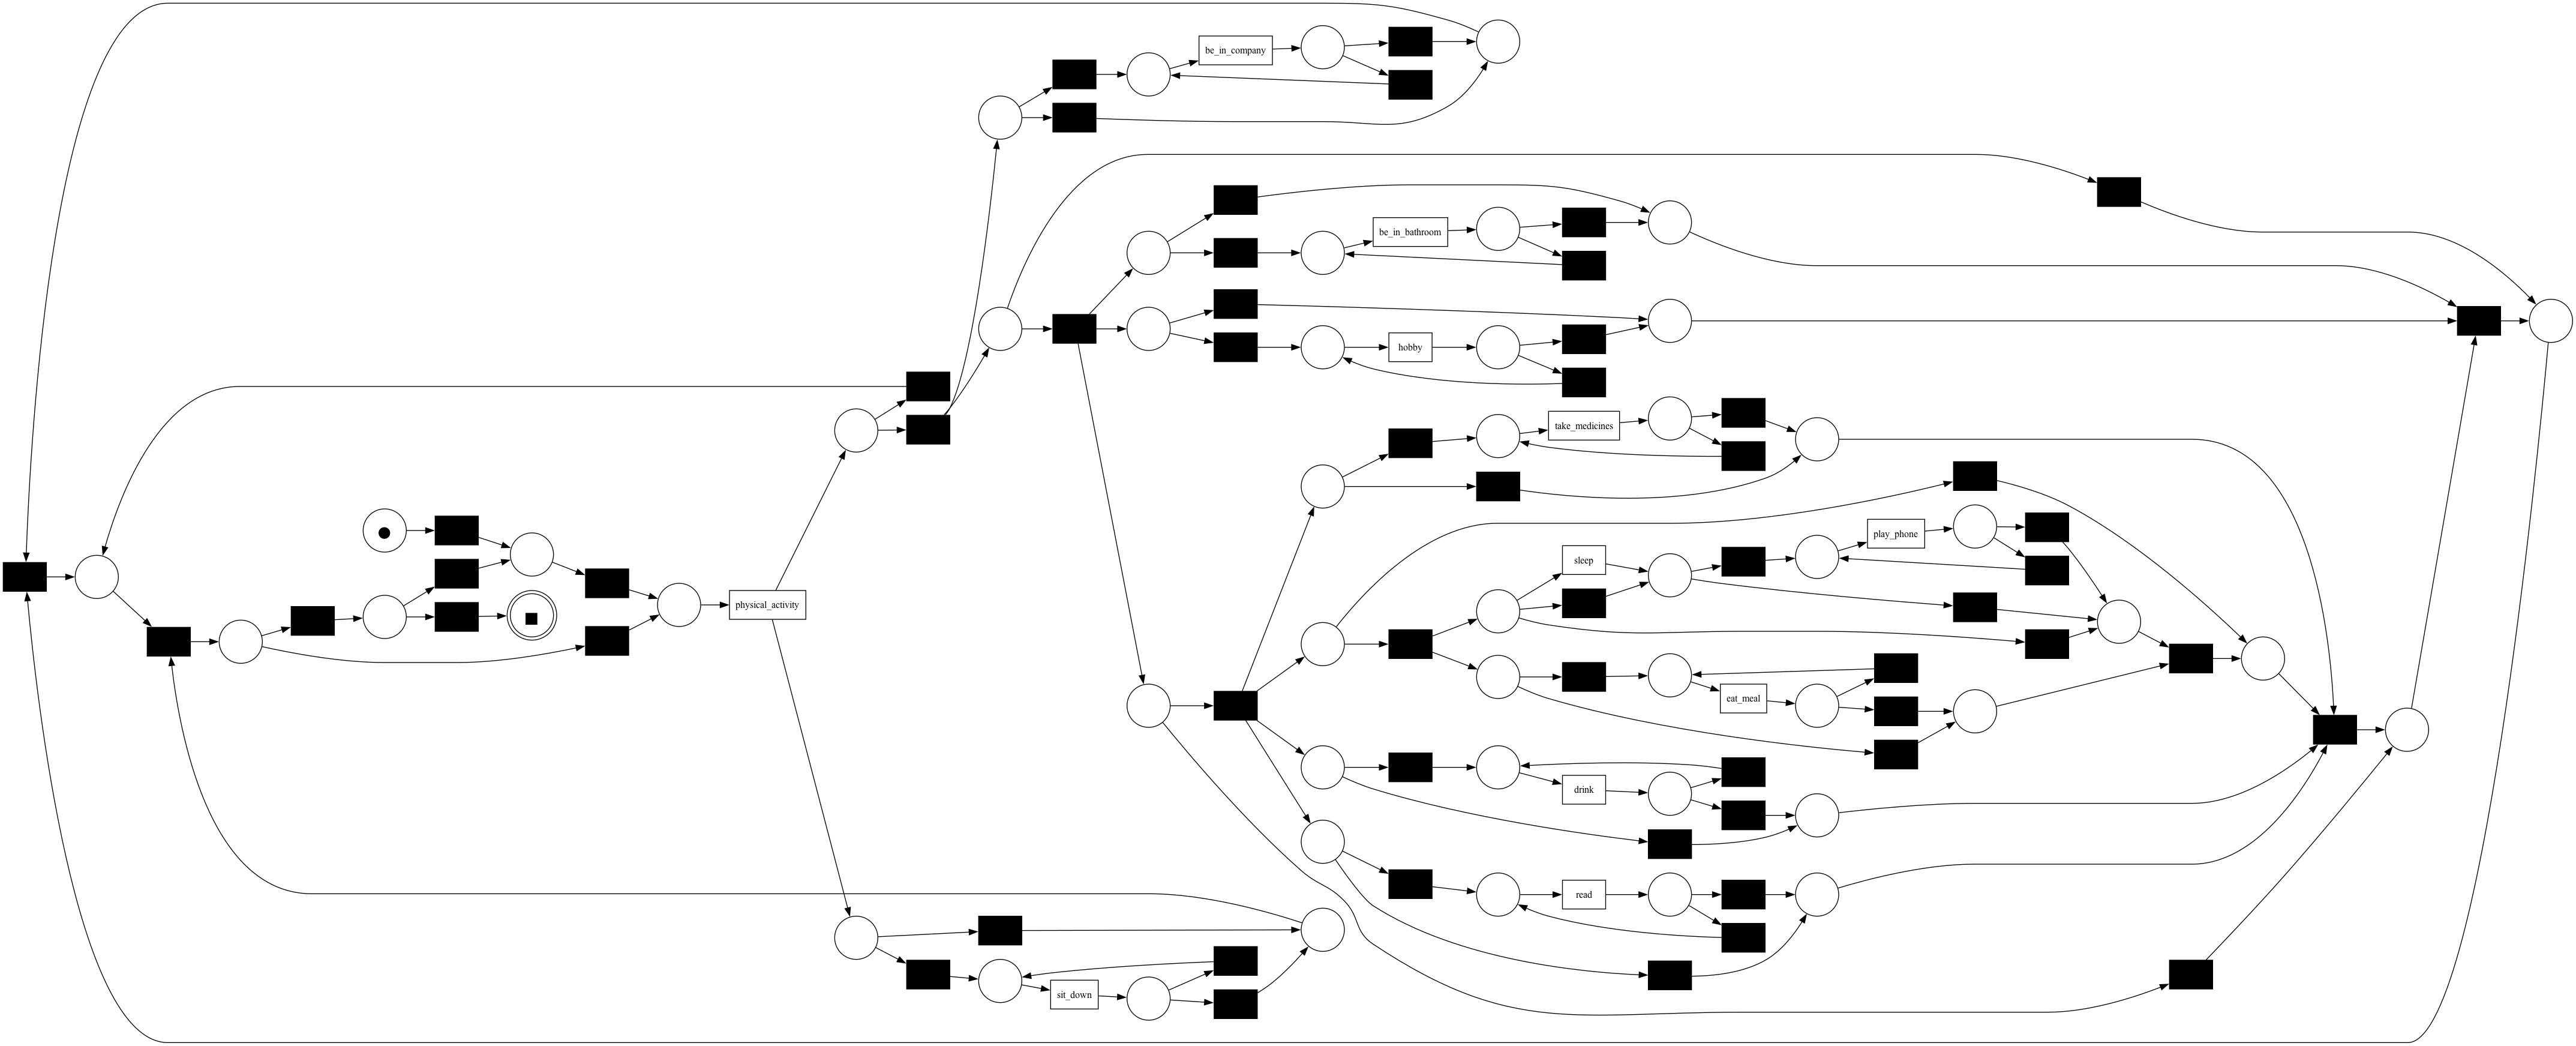

In [46]:
inductive_net_s2, inductive_im_s2, inductive_fm_s2 = pm4py.discover_petri_net_inductive(log_s2)
pm4py.view_petri_net(inductive_net_s2,inductive_im_s2, inductive_fm_s2)

In [47]:
# save the inductive petri net of the senior 2

pm4py.vis.save_vis_petri_net(inductive_net_s2, 
                             inductive_im_s2,
                             inductive_fm_s2,
                             file_path= path_petri_net_senior_2 +'inductive_petri_net.png'
                             )

''

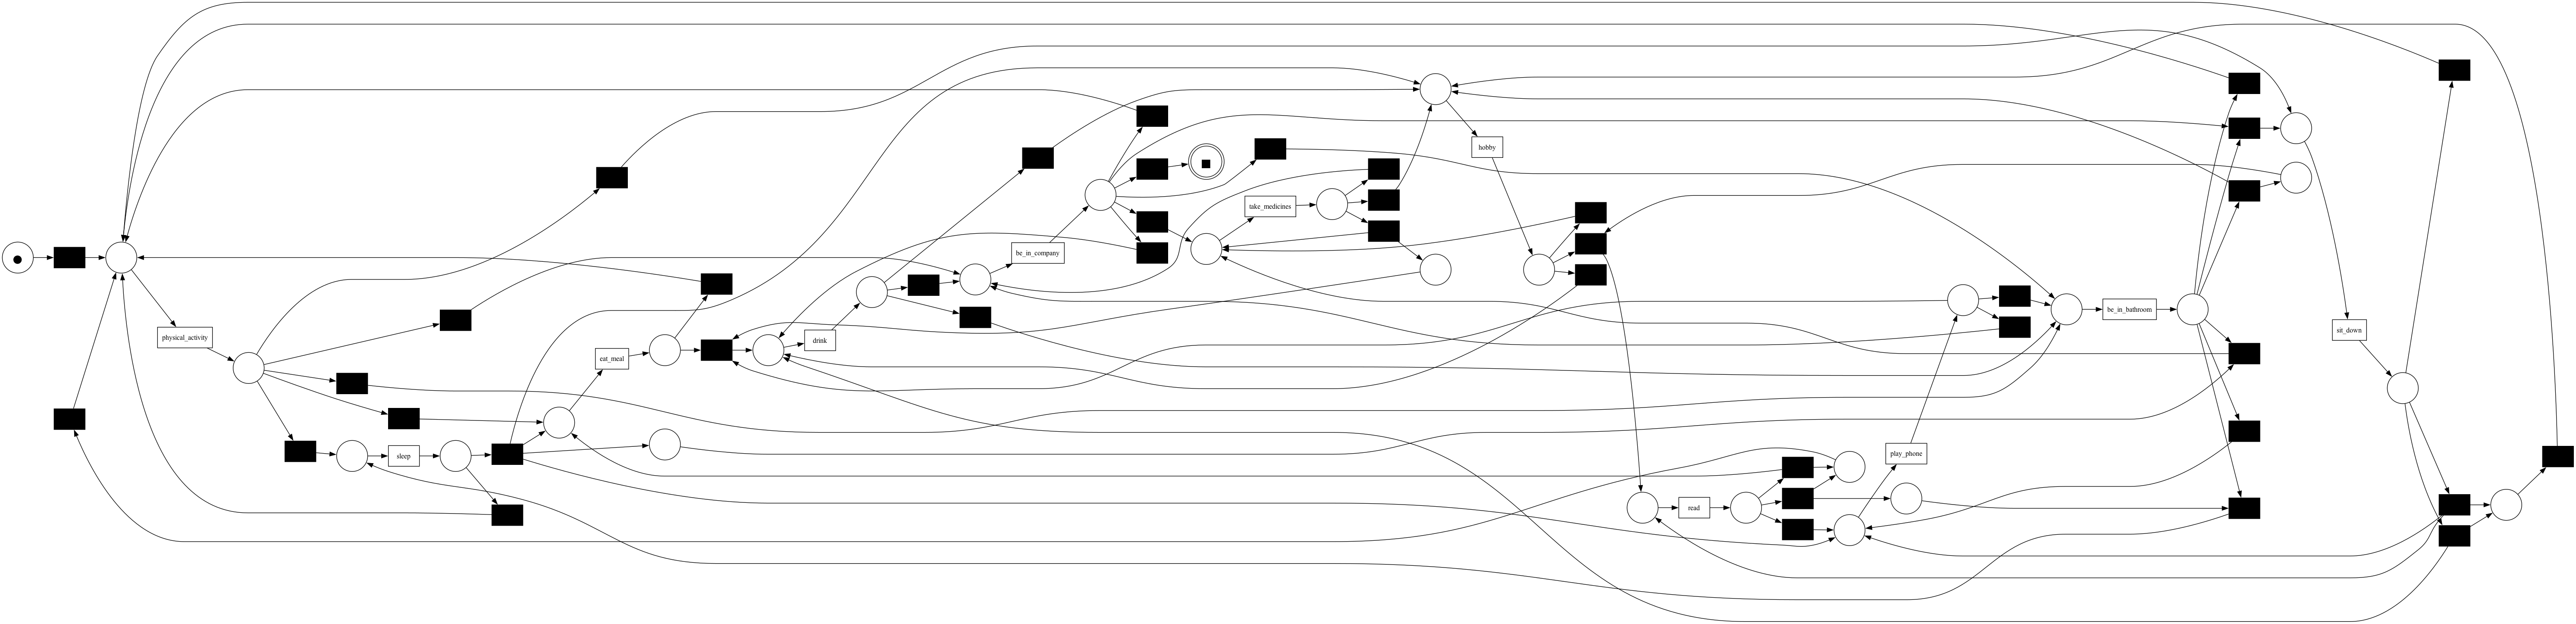

In [48]:
heuristic_net_s2, heuristic_im_s2, heuristic_fm_s2 = pm4py.discover_petri_net_heuristics(log_s2)
pm4py.view_petri_net(heuristic_net_s2,heuristic_im_s2, heuristic_fm_s2)

In [49]:
# save the heuristic petri net of the senior 2

pm4py.vis.save_vis_petri_net(heuristic_net_s2, 
                             heuristic_im_s2,
                             heuristic_fm_s2,
                             file_path= path_petri_net_senior_2 +'heuristic_petri_net.png'
                             )

''

## Senior 3

In [50]:
df_s3 = df[df['Senior']== 'S3']
df_s3.head()

Case_Identifier           Event_Timestamp   Type_Of_Event  \
5        Monday_S3 2024-01-01 08:10:45+00:00  begin_activity   
14       Monday_S3 2024-01-01 08:14:00+00:00    end_activity   
15       Monday_S3 2024-01-01 08:18:30+00:00  begin_activity   
20       Monday_S3 2024-01-01 08:25:45+00:00    end_activity   
21       Monday_S3 2024-01-01 08:30:20+00:00  begin_activity   

   Reference_Workflow Senior      Name_Activity Occurrency_Of_Activity  \
5              Monday     S3           eat_meal                      1   
14             Monday     S3           eat_meal                      1   
15             Monday     S3  physical_activity                      2   
20             Monday     S3  physical_activity                      2   
21             Monday     S3           sit_down                      2   

   case:concept:name       concept:name            time:timestamp  
5     begin_activity           eat_meal 2024-01-01 08:10:45+00:00  
14      end_activity           eat_meal 2024-01-01 08:14:00+00:00  
15    begin_activity  physical_activity 2024-01-01 08:18:30+00:00  
20      end_activity  physical_activity 2024-01-01 08:25:45+00:00  
21    begin_activity           sit_down 2024-01-01 08:30:20+00:00

In [51]:
log_s3 = pm4py.format_dataframe(df_s3,
                            case_id='Type_Of_Event',
                            activity_key='Name_Activity', 
                            timestamp_key='Event_Timestamp'
                           ) 

log_s3 = pm4py.convert_to_event_log(log_s3)
pm4py.write_xes(log, path_xes + 'senior_3.xes')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[constants.CASE_CONCEPT_NAME] = df[case_id]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[xes_constants.DEFAULT_NAME_KEY] = df[activity_key]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pm4py/utils.py:85: SettingWithCopyWarning:

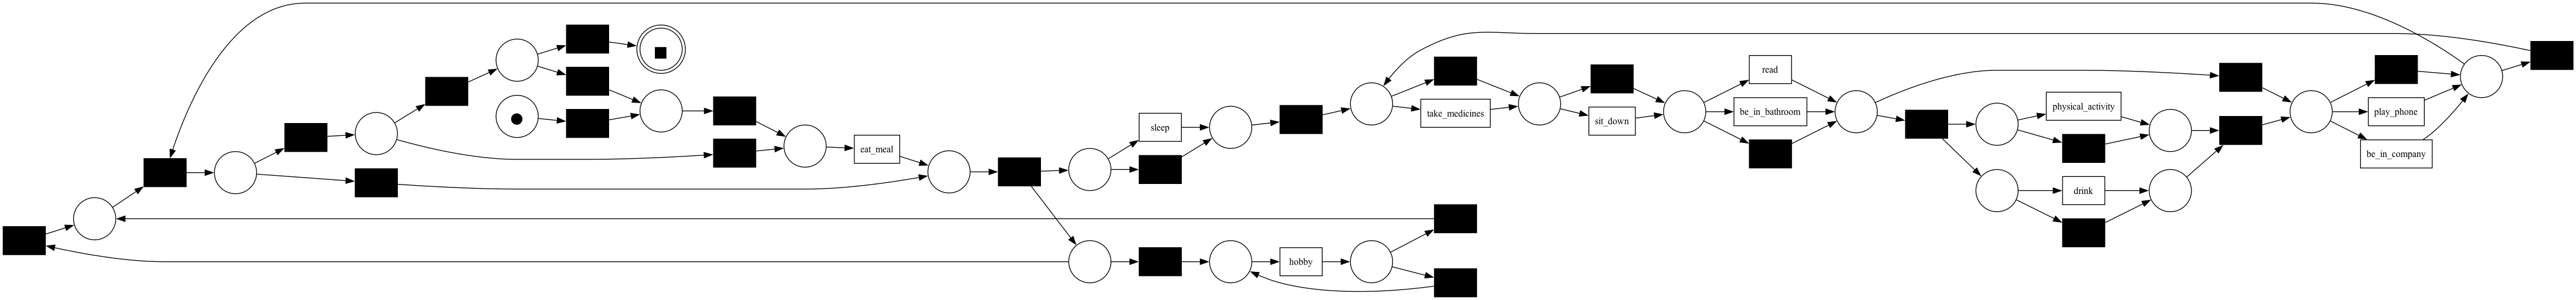

In [52]:
inductive_net_s3, inductive_im_s3, inductive_fm_s3 = pm4py.discover_petri_net_inductive(log_s3)
pm4py.view_petri_net(inductive_net_s3,inductive_im_s3, inductive_fm_s3)

In [53]:
# save the inductive petri net of the senior 3

pm4py.vis.save_vis_petri_net(inductive_net_s3, 
                             inductive_im_s3,
                             inductive_fm_s3,
                             file_path= path_petri_net_senior_3 +'inductive_petri_net.png'
                             )

''

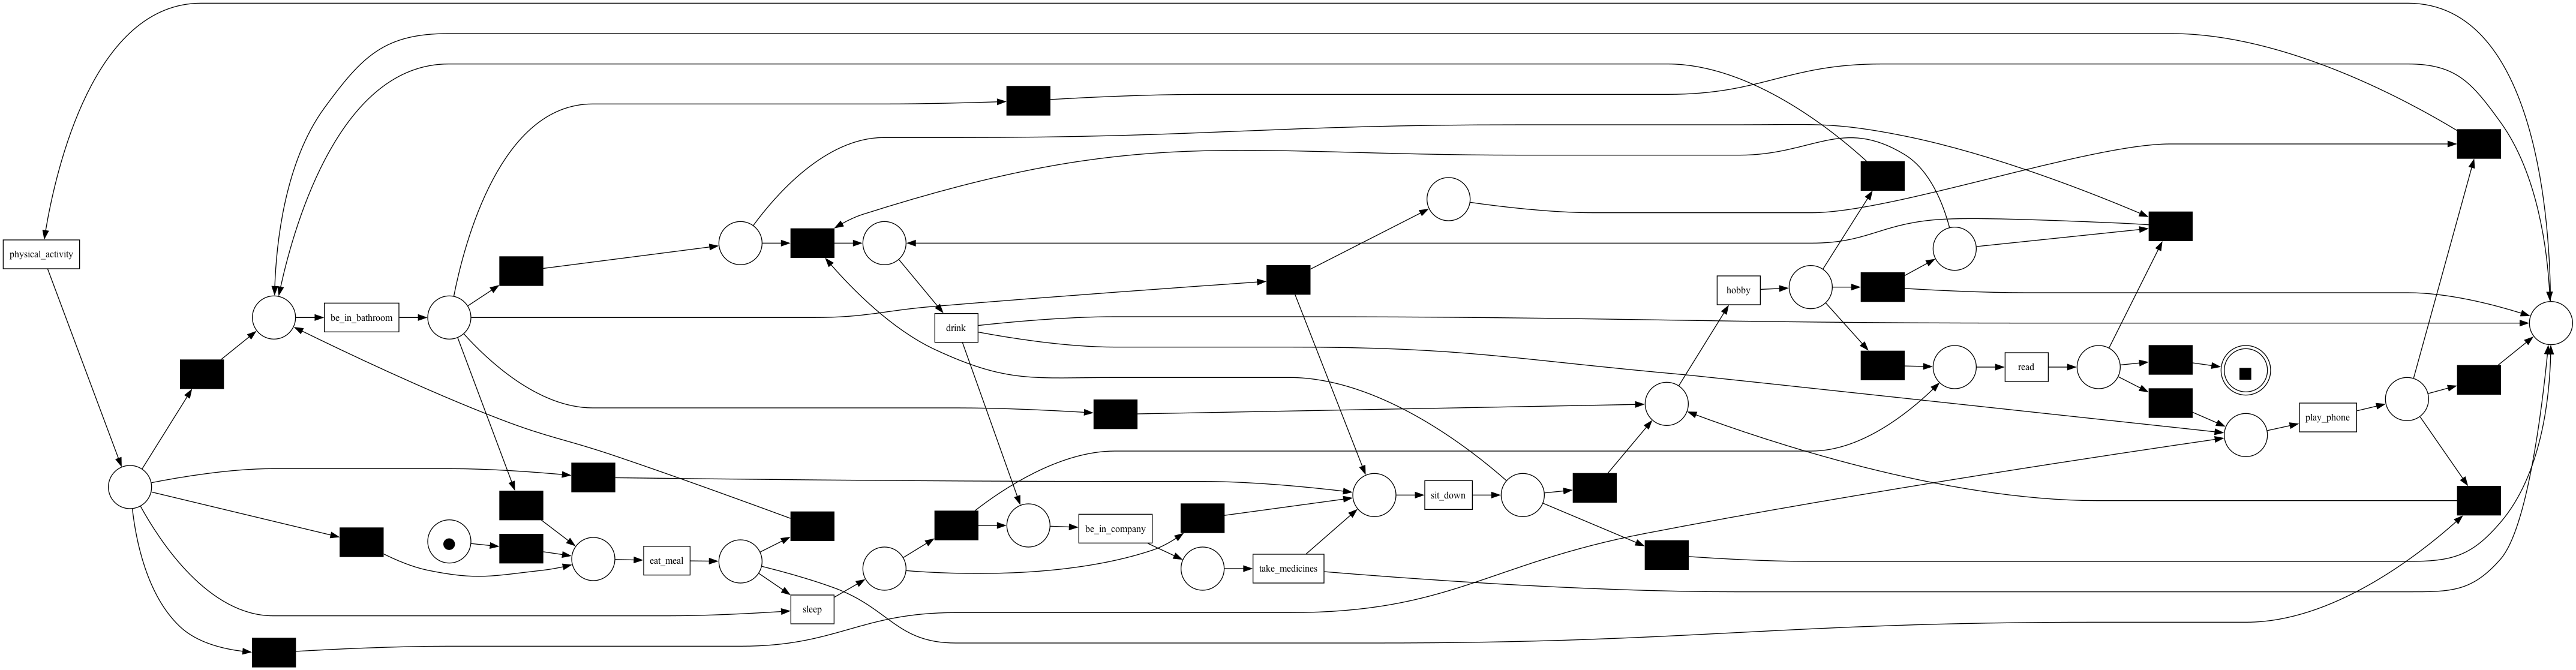

In [54]:
heuristic_net_s3, heuristic_im_s3, heuristic_fm_s3 = pm4py.discover_petri_net_heuristics(log_s3)
pm4py.view_petri_net(heuristic_net_s3,heuristic_im_s3, heuristic_fm_s3)

In [55]:
# save the heuristic petri net of the senior 3

pm4py.vis.save_vis_petri_net(heuristic_net_s3, 
                             heuristic_im_s3,
                             heuristic_fm_s3,
                             file_path= path_petri_net_senior_3 +'heuristic_petri_net.png'
                             )

''